<a href="https://colab.research.google.com/github/Isra1997/Highboost-filter/blob/master/Question2_Assignment1_ImageProcessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

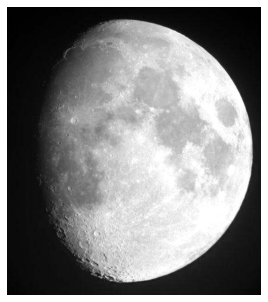

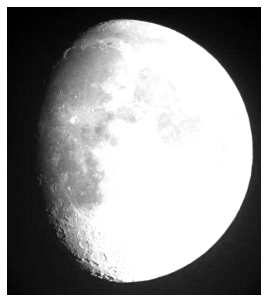

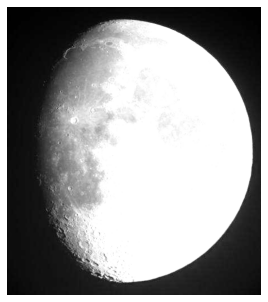

In [0]:

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
from PIL import Image

def highBoost(image,order,cutoff,a):
  img=np.asarray(cv2.imread(image,0))

  # Get the fourier transform of the image
  ft=np.fft.fft(img)

  # Shift the fourier transform
  sft=np.fft.fftshift(ft)

  # fourier transform
  magnitude_spectrum = sft

  rows,cols=img.shape
  butterFlt=np.zeros(img.shape)
  result=np.zeros(img.shape)

  # Computing the highpass and highboost filter
  for i in range(-int(rows/2),int(rows/2)):
    for j in range(-int(cols/2),int(cols/2)):
      distance=math.sqrt(pow(i,2)+pow(j,2))
      if(distance==0):
        one=(cutoff)
      else:
        one=(cutoff/distance)
      two=2*order
      demo=1+pow(one,two)
      butterFlt[i,j]=(a-1)+(1/demo)
  
  

  # Applying the filter in the frequncy domain
  result=np.multiply(magnitude_spectrum,butterFlt)
  
  # Applying inverse fourier transform to transform the image back to the spatial domain
  f_ishift = np.fft.ifftshift(result)
  back = np.fft.ifft(f_ishift)
  img_back = np.abs(back)


  x=Image.fromarray(img_back)
  fig = plt.figure(frameon=False)
  

  ax = plt.Axes(fig, [0., 0., 1., 1.])
  ax.set_axis_off()
  fig.add_axes(ax)
  plt.imshow(x)
  return x
  

  
  
  

def main():
  # Moon_1
  Moon_1=highBoost('Moon.jpg',1,50,1.5)
  plt.savefig('MoonHB_1.jpg')
  # Moon_2
  Moon_2=highBoost('Moon.jpg',1,50,2)
  plt.savefig('MoonHB_2.jpg')
  # Moon_2
  Moon_3=highBoost('Moon.jpg',2,50,2)
  plt.savefig('MoonHB_3.jpg')

if __name__=='__main__':
  main()

